Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 027
Code Title: | Digital Signal Processing and Application
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**Activity Title** | **Project Presentation**
**Members** | Ejercito, Marlon Jason <br><br> Garcia, Christian Andrei <br><br> Ogata, Kazuki <br><br> Quizon, Nowell Gabriel <br><br> Zapanta, Jaison Martin
**Section** | CPE41S1
**Date Performed**: | November 21, 2024
**Date Submitted**: | November 23, 2024
**Instructor**: | Engr. Bonry Dorado

<hr>

# EMOTIONAL SPEECH RECOGNITION

# Import Libraries

In [3]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

# Mount GDrive

In [4]:
from google.colab import drive

# Mount Google Drive to access audio files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Emotions Speech Datasets

In [5]:
DATA_FRAMES = True
fem_path = '/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/features/Female_features.csv'
mal_path = '/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/features/Male_features.csv'

In [6]:
TESS = "/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data"
RAV = "/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/ravdess-emotional-speech-audio/audio_speech_actors_01-24"
SAVEE = "/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/surrey-audiovisual-expressed-emotion-savee/ALL"
CREMA = "/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/cremad/AudioWAV"

In [7]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown')
    path.append(SAVEE + i)

# Now check out the label count distribution
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


labels                                               path
0  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
1  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
2  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
3  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
4  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...

In [8]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + "/" + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


labels                                               path
0  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
1  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
2  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
3  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
4  angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...

In [9]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = []

for actor in dir:

    files = os.listdir(RAV + "/" + actor)

    for file in files:
        part = file.split('.')[0]
        part = part.split("-")

        temp = int(part[6])

        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'

        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path])
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])


RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


labels                                               path
0  neutral  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
1  neutral  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
2  neutral  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
3    happy  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
4    happy  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...

In [10]:
RavMales_df.head()

labels                                               path
0    happy  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
1  neutral  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
2    happy  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
3     calm  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
4     calm  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...

In [11]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files:
    part = file.split('_')

    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'
    else:
        emotion = 'unknown'

    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path])
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])

CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']

print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


labels                                               path
0  neutral  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
1    happy  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
2  disgust  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
3    angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
4    angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...

In [12]:
CremaMales_df.head()

labels                                               path
0    happy  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
1    angry  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
2  neutral  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
3     fear  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...
4  disgust  /content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/...

In [13]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

# Data Visualization

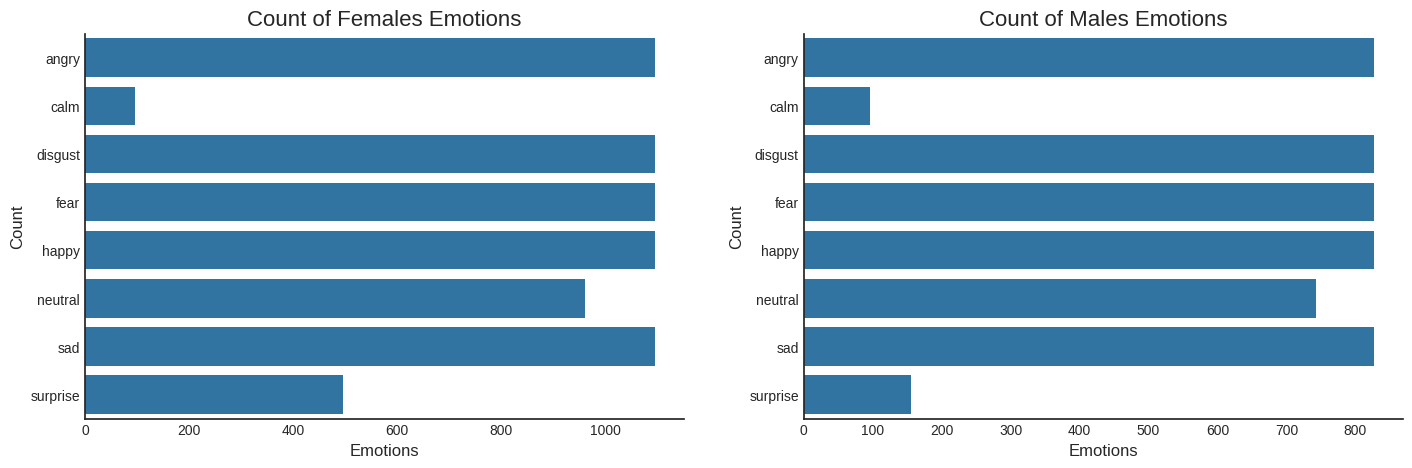

In [14]:
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [15]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)  # Use waveshow instead of waveplot
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

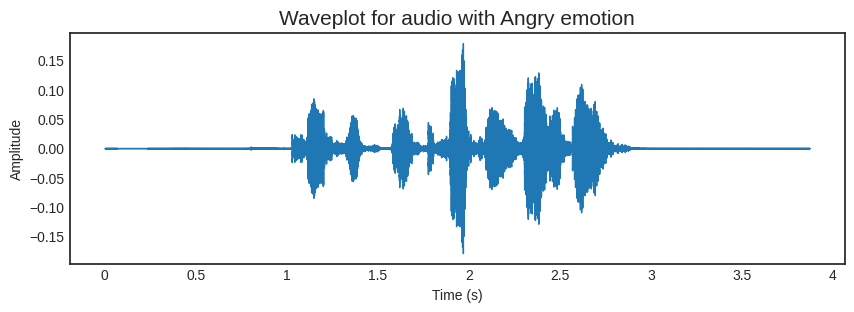

In [16]:
emotion = 'Angry'
path = '/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

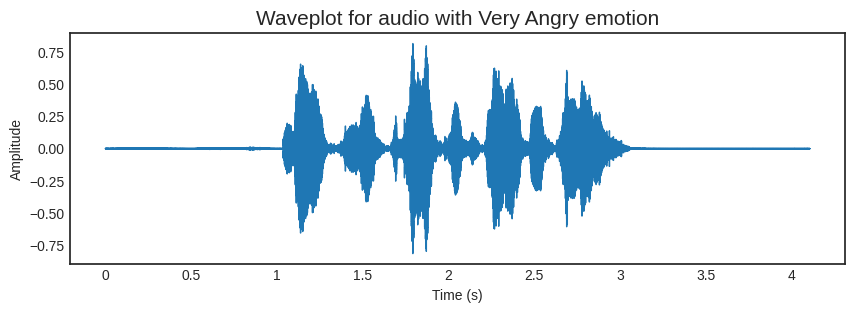

In [17]:
emotion='Very Angry'
path = '/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/ravdess-emotional-speech-audio/Actor_01/03-01-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

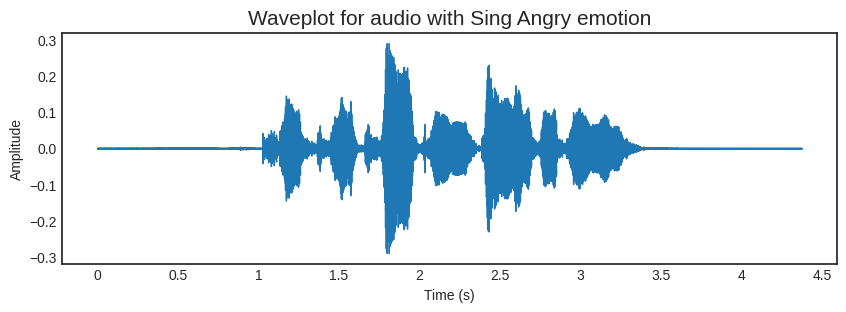

In [18]:
emotion='Sing Angry'
path = '/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/ravdess-emotional-song-audio/Actor_01/03-02-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

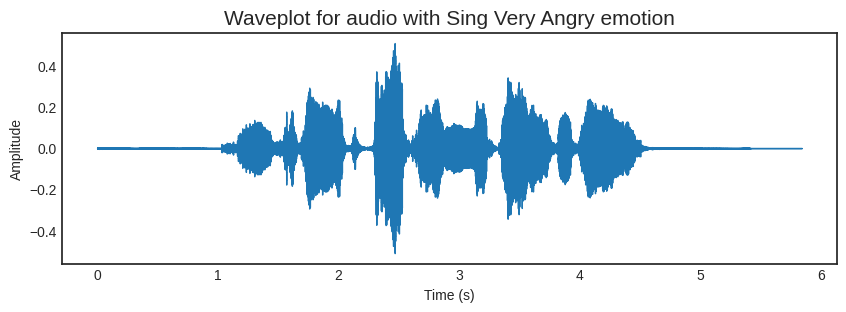

In [19]:
emotion='Sing Very Angry'
path = '/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/ravdess-emotional-song-audio/Actor_01/03-02-05-02-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

# Adding Augmentation

In [20]:
def noise(data):
    noise_amp = 0.04 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

def higher_speed(data, speed_factor=1.25):
    return librosa.effects.time_stretch(data, rate=speed_factor)

def lower_speed(data, speed_factor=0.75):
    return librosa.effects.time_stretch(data, rate=speed_factor)

# Load audio file
path = '/content/drive/MyDrive/DSP-FINAL-PROJ-DATASET/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

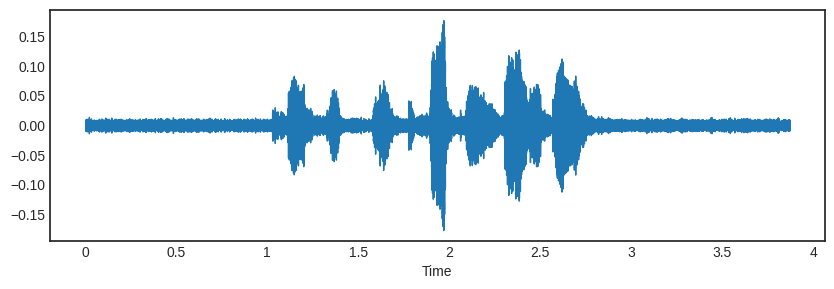

In [21]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

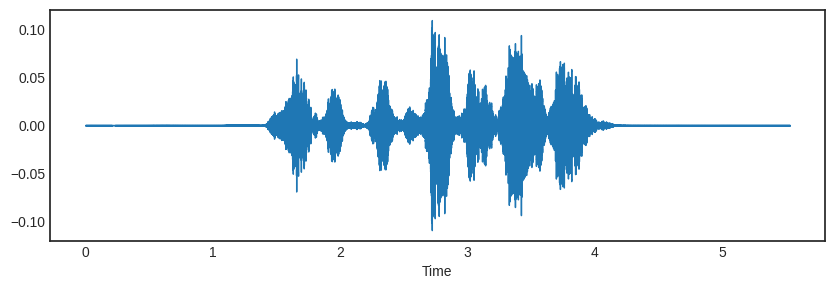

In [22]:
plt.figure(figsize=(10, 3))
x = stretch(data, rate=0.70)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

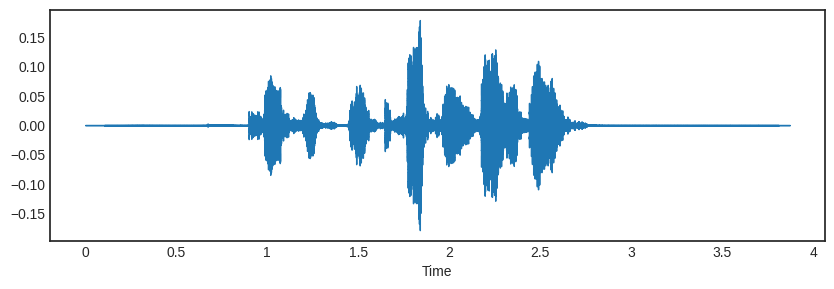

In [23]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

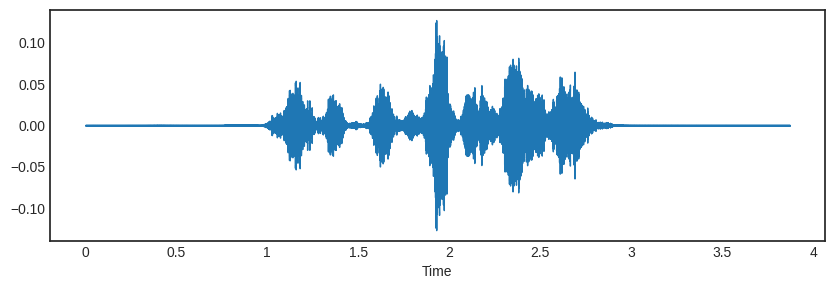

In [24]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

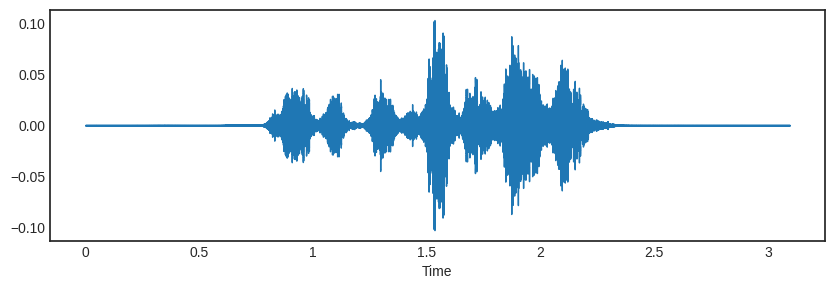

In [25]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

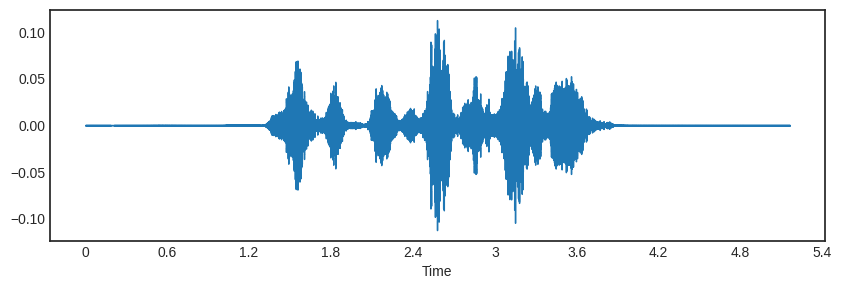

In [26]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

# Feature Extraction (MFCC)

In [27]:
#sample_rate = 22050

def extract_features(data):

    result = np.array([])

    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast')

    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))

    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))

    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))

    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))

    return result

In [28]:
if not DATA_FRAMES:

    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features:
            female_X.append(elem)
            female_Y.append(emotion)


    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)

    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

In [29]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'{gender}_features.csv', index=False)

    print(f'{gender} dataframe')
    df.sample(frac=1).head()

    return df

In [30]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

In [31]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

# Data Preparation

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [33]:
female_X = Females_Features.iloc[: ,:-1].values
female_Y = Females_Features['labels'].values

male_X = Males_Features.iloc[: ,:-1].values
male_Y = Males_Features['labels'].values

In [34]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()

female_Y = encoder.fit_transform(np.array(female_Y).reshape(-1,1)).toarray()
male_Y = encoder.fit_transform(np.array(male_Y).reshape(-1,1)).toarray()

# Splitting Data

In [35]:
nogender_X = np.concatenate((female_X, male_X))
nogender_Y = np.concatenate((female_Y, male_Y))

x_train, x_test, y_train, y_test = train_test_split(nogender_X, nogender_Y, random_state=0, test_size=0.20, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((68107, 58), (68107, 8), (17027, 58), (17027, 8))

In [36]:
x_trainF, x_testF, y_trainF, y_testF = train_test_split(female_X, female_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58), (39379, 8), (9845, 58), (9845, 8))

In [37]:
x_trainM, x_testM, y_trainM, y_testM = train_test_split(male_X, male_Y, random_state=0, test_size=0.20, shuffle=True)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58), (28728, 8), (7182, 58), (7182, 8))

In [38]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_trainF = scaler.fit_transform(x_trainF)
x_testF = scaler.transform(x_testF)

x_trainM = scaler.fit_transform(x_trainM)
x_testM = scaler.transform(x_testM)

# Making Data Compatible to Model

In [39]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((68107, 58, 1), (68107, 8), (17027, 58, 1), (17027, 8))

In [40]:
x_trainF = np.expand_dims(x_trainF, axis=2)
x_testF = np.expand_dims(x_testF, axis=2)
x_trainF.shape, y_trainF.shape, x_testF.shape, y_testF.shape

((39379, 58, 1), (39379, 8), (9845, 58, 1), (9845, 8))

In [41]:
x_trainM = np.expand_dims(x_trainM, axis=2)
x_testM = np.expand_dims(x_testM, axis=2)
x_trainM.shape, y_trainM.shape, x_testM.shape, y_testM.shape

((28728, 58, 1), (28728, 8), (7182, 58, 1), (7182, 8))

# Modeling

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [43]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [44]:
# Create a MirroredStrategy.
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [45]:
with strategy.scope():

    def build_model(in_shape):

        model=Sequential()
        model.add(Conv1D(256, kernel_size=6, strides=1, padding='same', activation='relu', input_shape=(in_shape, 1)))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Conv1D(128, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(AveragePooling1D(pool_size=4, strides = 2, padding = 'same'))
        model.add(Dropout(0.2))

        model.add(Conv1D(64, kernel_size=6, strides=1, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=4, strides = 2, padding = 'same'))

        model.add(Flatten())
        model.add(Dense(units=32, activation='relu'))
        model.add(Dropout(0.3))

        model.add(Dense(units=8, activation='softmax'))
        model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


        return model

In [46]:
def model_build_summary(mod_dim, tr_features, val_features, val_labels):
    model = build_model(mod_dim)
    model.summary()

    score = model.evaluate(val_features, val_labels, verbose = 1)
    accuracy = 100*score[1]

    return model

In [47]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=4, min_lr=0.000001)

batch_size = 64
n_epochs = 75

In [48]:
def show_graphs(history):
    epochs = [i for i in range(n_epochs)]
    fig , ax = plt.subplots(1,2)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    test_acc = history.history['val_accuracy']
    test_loss = history.history['val_loss']

    fig.set_size_inches(30,12)
    ax[0].plot(epochs , train_loss , label = 'Training Loss')
    ax[0].plot(epochs , test_loss , label = 'Testing Loss')
    ax[0].set_title('Training & Testing Loss')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")

    ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
    ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
    ax[1].set_title('Training & Testing Accuracy')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    plt.show()

# Model Summary and Pre-Training Accuracy

In [49]:
total_model = model_build_summary(x_train.shape[1], x_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 58, 256)             │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d (AveragePooling1D) │ (None, 29, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 29, 128)             │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_1                  │ (None, 15, 128)             │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 15, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_2                  │ (None, 8, 128)              │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 8, 64)               │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,664 (1.35 MB)

 Trainable params: 354,664 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

533/533 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1530 - loss: 2.0817


In [50]:
female_model = model_build_summary(x_trainF.shape[1], x_trainF, x_testF, y_testF)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 58, 256)             │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_3                  │ (None, 29, 256)             │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 29, 128)             │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_4                  │ (None, 15, 128)             │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 15, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_5                  │ (None, 8, 128)              │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 8, 64)               │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,664 (1.35 MB)

 Trainable params: 354,664 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1447 - loss: 2.0773


In [51]:
male_model = model_build_summary(x_trainM.shape[1], x_trainM, x_testM, y_testM)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 58, 256)             │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_6                  │ (None, 29, 256)             │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 29, 128)             │         196,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_7                  │ (None, 15, 128)             │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 15, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_8                  │ (None, 8, 128)              │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 8, 64)               │          49,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,664 (1.35 MB)

 Trainable params: 354,664 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0309 - loss: 2.0790


# Model Training

In [52]:
history = total_model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_test, y_test), callbacks=[rlrp])

total_model.save("total_model.h5")

Epoch 1/75
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3549 - loss: 1.6042 - val_accuracy: 0.5208 - val_loss: 1.2251 - learning_rate: 0.0010
Epoch 2/75
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5095 - loss: 1.2288 - val_accuracy: 0.5485 - val_loss: 1.1066 - learning_rate: 0.0010
Epoch 3/75
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5507 - loss: 1.1359 - val_accuracy: 0.5831 - val_loss: 1.0459 - learning_rate: 0.0010
Epoch 4/75
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5732 - loss: 1.0726 - val_accuracy: 0.5953 - val_loss: 1.0131 - learning_rate: 0.0010
Epoch 5/75
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5954 - loss: 1.0303 - val_accuracy: 0.6183 - val_loss: 0.9722 - learning_rate: 0.0010
Epoch 6/75
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6129 - loss: 0.9833 - val_accuracy: 0.6353 - val_loss: 0.9219 - learning_rate: 0.0010
Epoch 7/75
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6244 

In [53]:
female_history = female_model.fit(x_trainF, y_trainF, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testF, y_testF), callbacks=[rlrp])

female_model.save("female_model.h5")

Epoch 1/75
616/616 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.4004 - loss: 1.5188 - val_accuracy: 0.6138 - val_loss: 0.9615 - learning_rate: 0.0010
Epoch 2/75
616/616 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5853 - loss: 1.0361 - val_accuracy: 0.6483 - val_loss: 0.8718 - learning_rate: 0.0010
Epoch 3/75
616/616 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6256 - loss: 0.9307 - val_accuracy: 0.6689 - val_loss: 0.8024 - learning_rate: 0.0010
Epoch 4/75
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6528 - loss: 0.8677 - val_accuracy: 0.6974 - val_loss: 0.7468 - learning_rate: 0.0010
Epoch 5/75
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6781 - loss: 0.8008 - val_accuracy: 0.7166 - val_loss: 0.7126 - learning_rate: 0.0010
Epoch 6/75
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6943 - loss: 0.7684 - val_accuracy: 0.7216 - val_loss: 0.6904 - learning_rate: 0.0010
Epoch 7/75
616/616 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7116 - loss: 0.7243

In [54]:
male_history = male_model.fit(x_trainM, y_trainM, batch_size=batch_size, epochs=n_epochs, validation_data=(x_testM, y_testM), callbacks=[rlrp])

male_model.save("male_model.h5")

Epoch 1/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2436 - loss: 1.8385 - val_accuracy: 0.3997 - val_loss: 1.5233 - learning_rate: 0.0010
Epoch 2/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3727 - loss: 1.5588 - val_accuracy: 0.4251 - val_loss: 1.4178 - learning_rate: 0.0010
Epoch 3/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4137 - loss: 1.4495 - val_accuracy: 0.4641 - val_loss: 1.3426 - learning_rate: 0.0010
Epoch 4/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4545 - loss: 1.3810 - val_accuracy: 0.5084 - val_loss: 1.2766 - learning_rate: 0.0010
Epoch 5/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4703 - loss: 1.3373 - val_accuracy: 0.5103 - val_loss: 1.2477 - learning_rate: 0.0010
Epoch 6/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4892 - loss: 1.2856 - val_accuracy: 0.5324 - val_loss: 1.2060 - learning_rate: 0.0010
Epoch 7/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5098 - loss: 1.2431 

# Performance Evaluations

In [55]:
# genderless
score = total_model.evaluate(x_train,y_train, verbose = 0)
print("Mixed-gender emotions training Accuracy: {0:.2%}".format(score[1]))

score = total_model.evaluate(x_test, y_test, verbose=0)
print("Mixed-gender emotions testing Accuracy: {0:.2%}".format(score[1]))

Mixed-gender emotions training Accuracy: 97.26%
Mixed-gender emotions testing Accuracy: 88.00%


In [56]:
score = female_model.evaluate(x_trainF,y_trainF, verbose = 0)
print("Female emotions training Accuracy: {0:.2%}".format(score[1]))

score = female_model.evaluate(x_testF, y_testF, verbose=0)
print("Female emotions testing Accuracy: {0:.2%}".format(score[1]))

Female emotions training Accuracy: 99.53%
Female emotions testing Accuracy: 93.33%


In [57]:
score = male_model.evaluate(x_trainM,y_trainM, verbose = 0)
print("Male emotions training Accuracy: {0:.2%}".format(score[1]))

score = male_model.evaluate(x_testM, y_testM, verbose=0)
print("Male emotions testing Accuracy: {0:.2%}".format(score[1]))

Male emotions training Accuracy: 98.30%
Male emotions testing Accuracy: 87.66%


# Training and Validation Trends

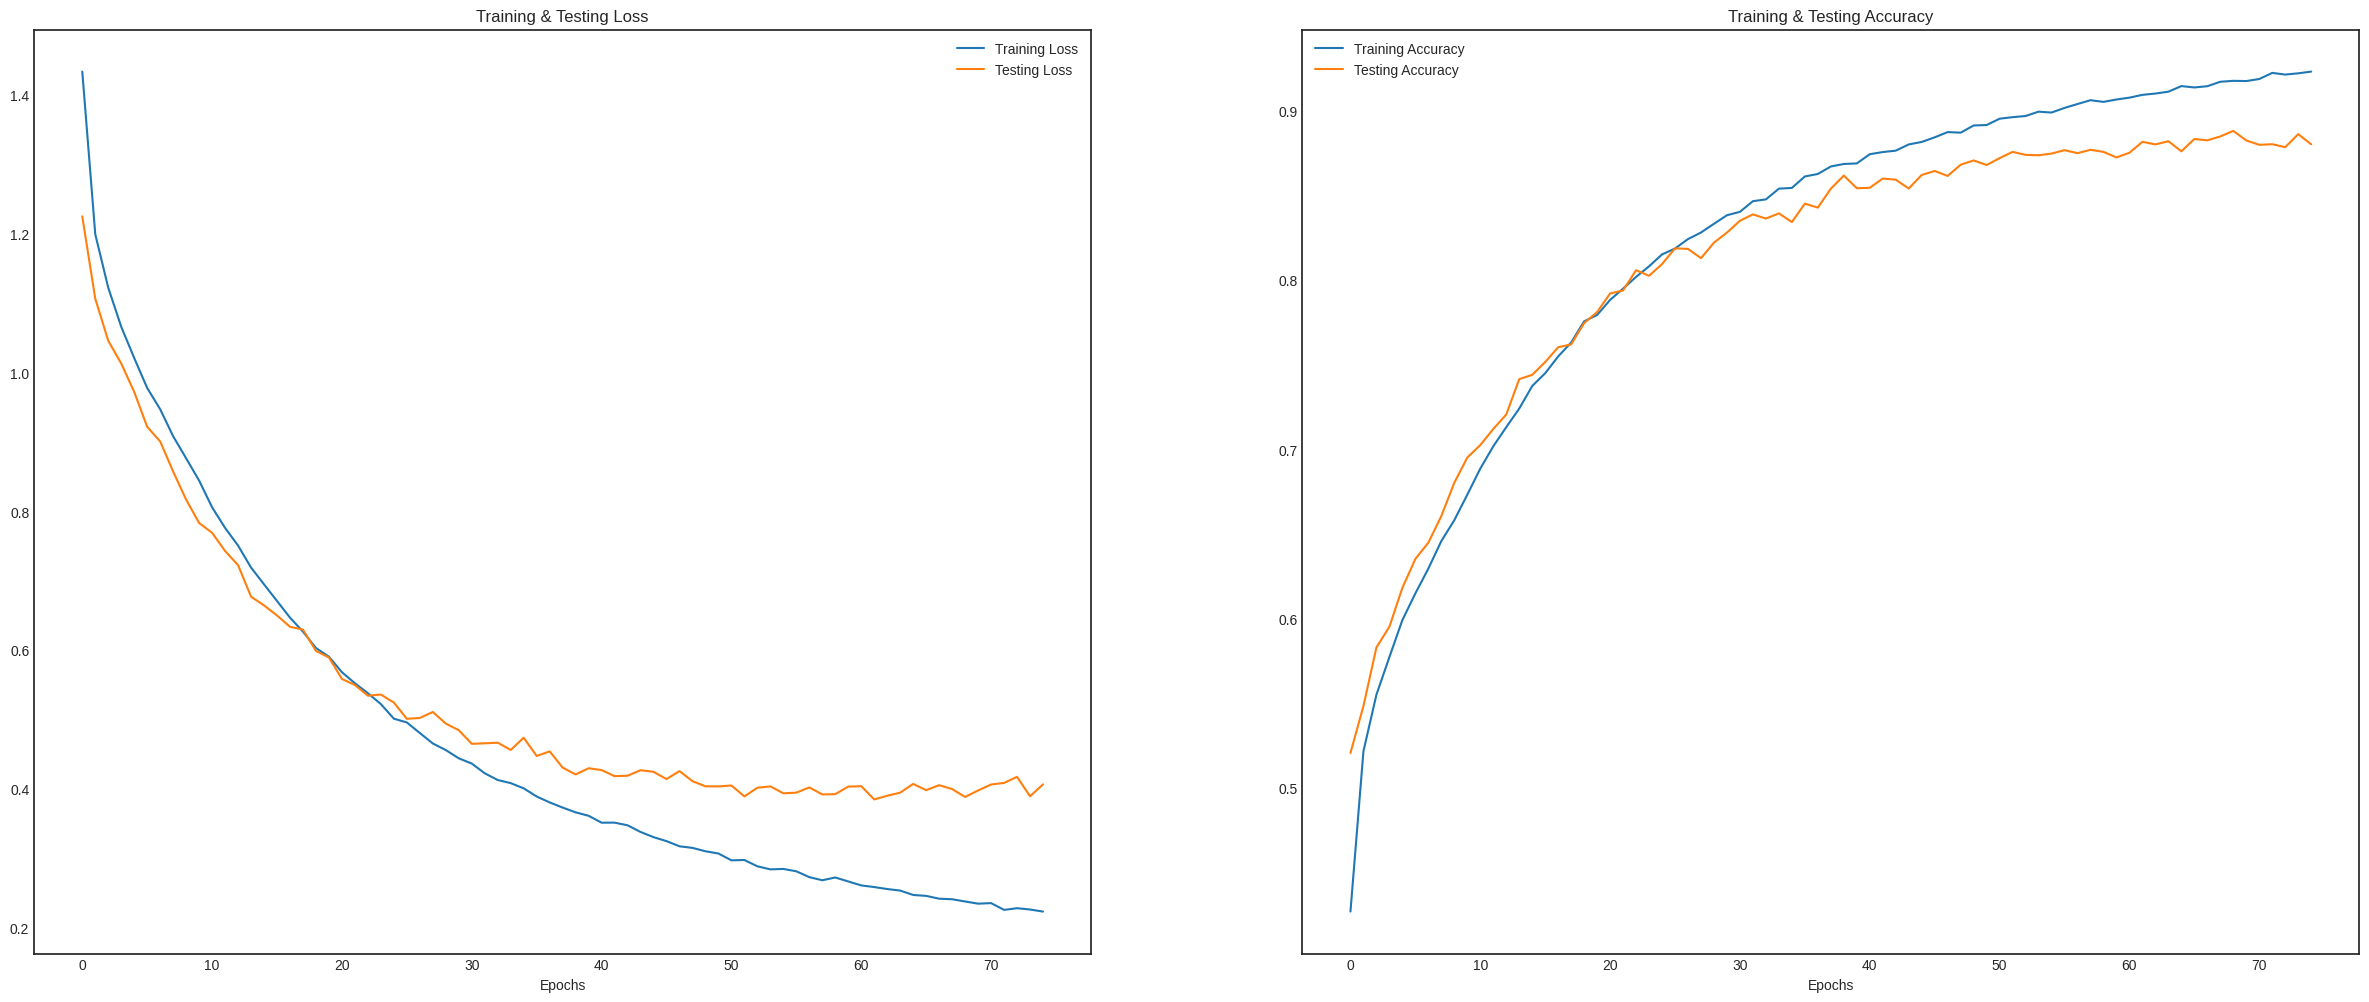

In [58]:
show_graphs(history)

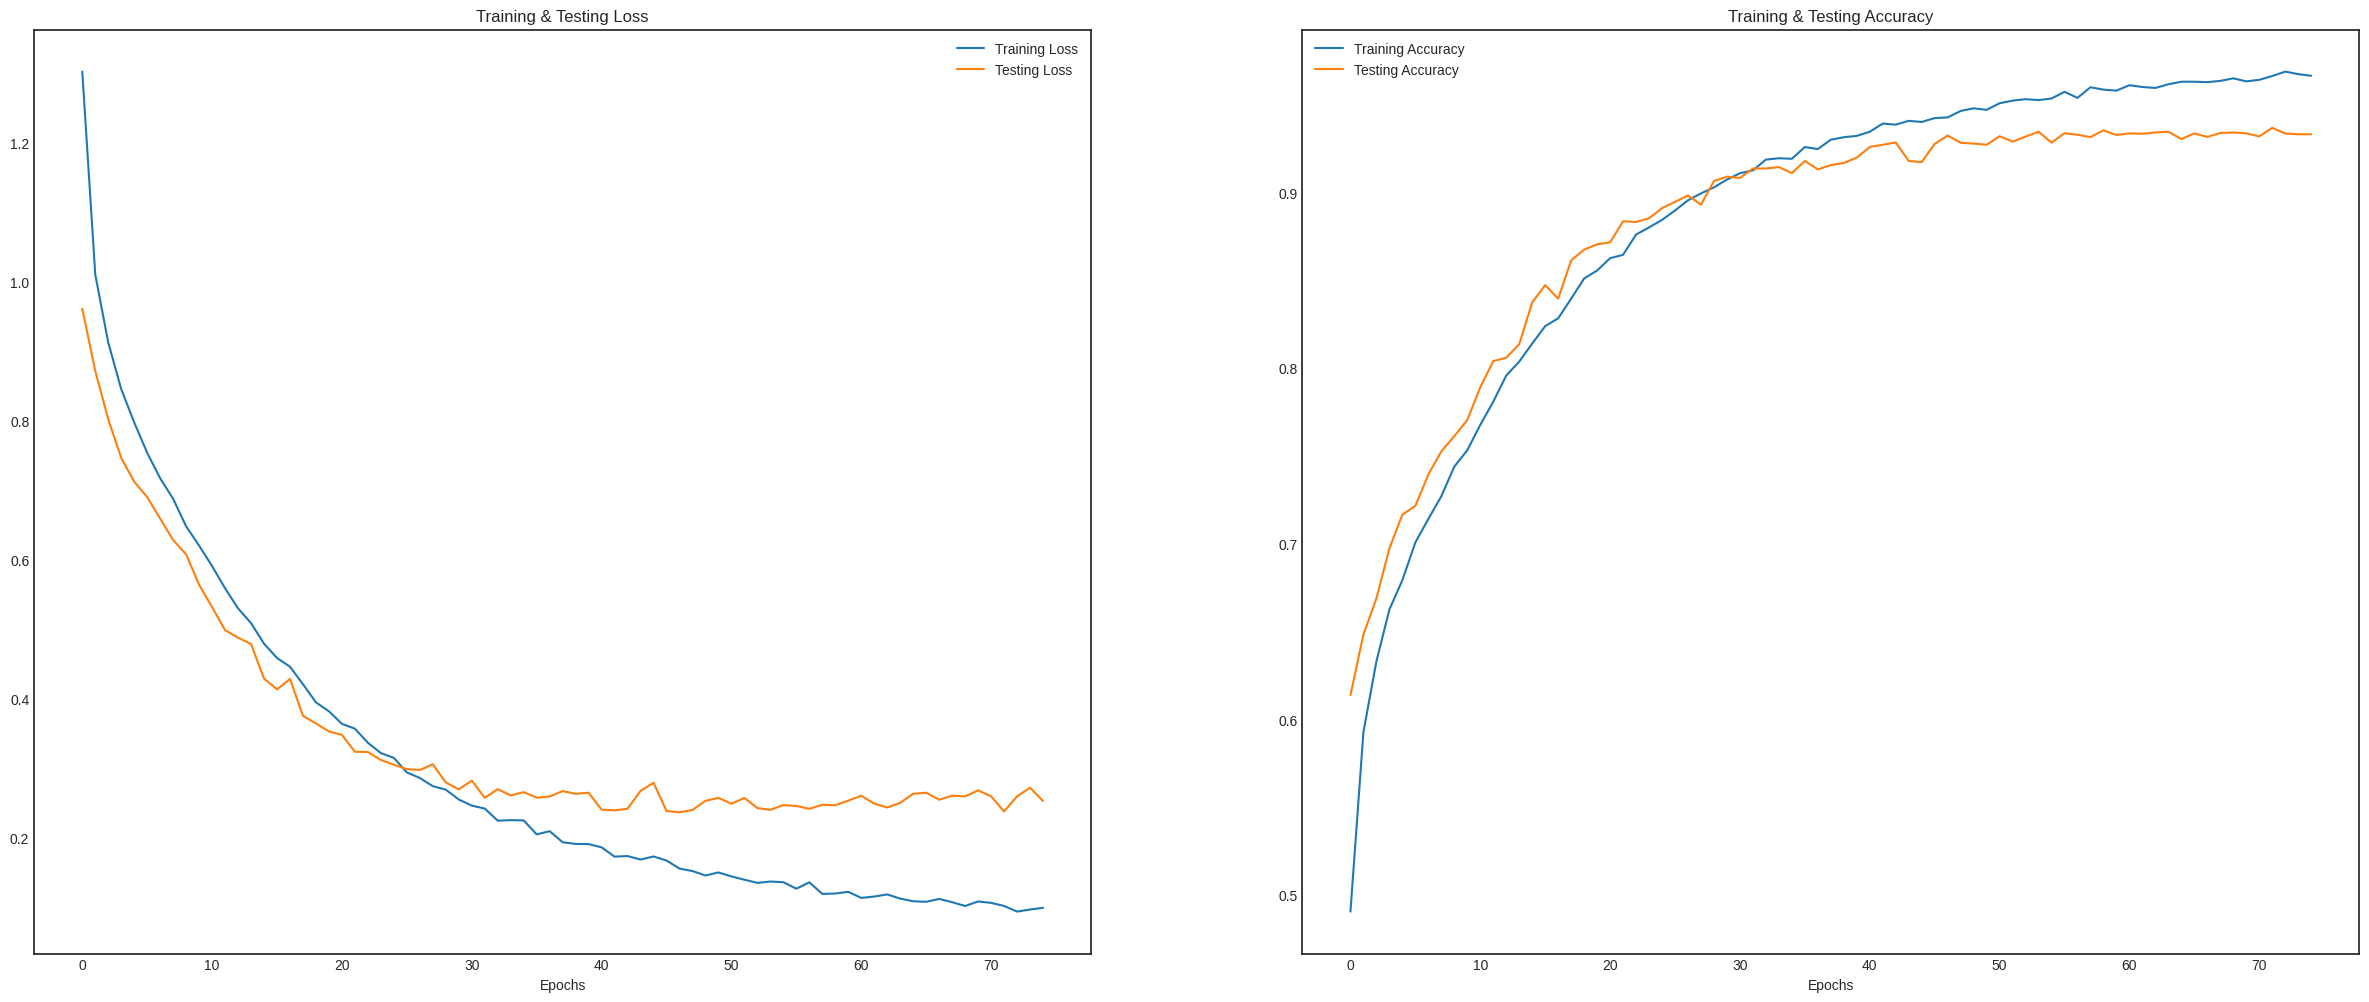

In [59]:
show_graphs(female_history)

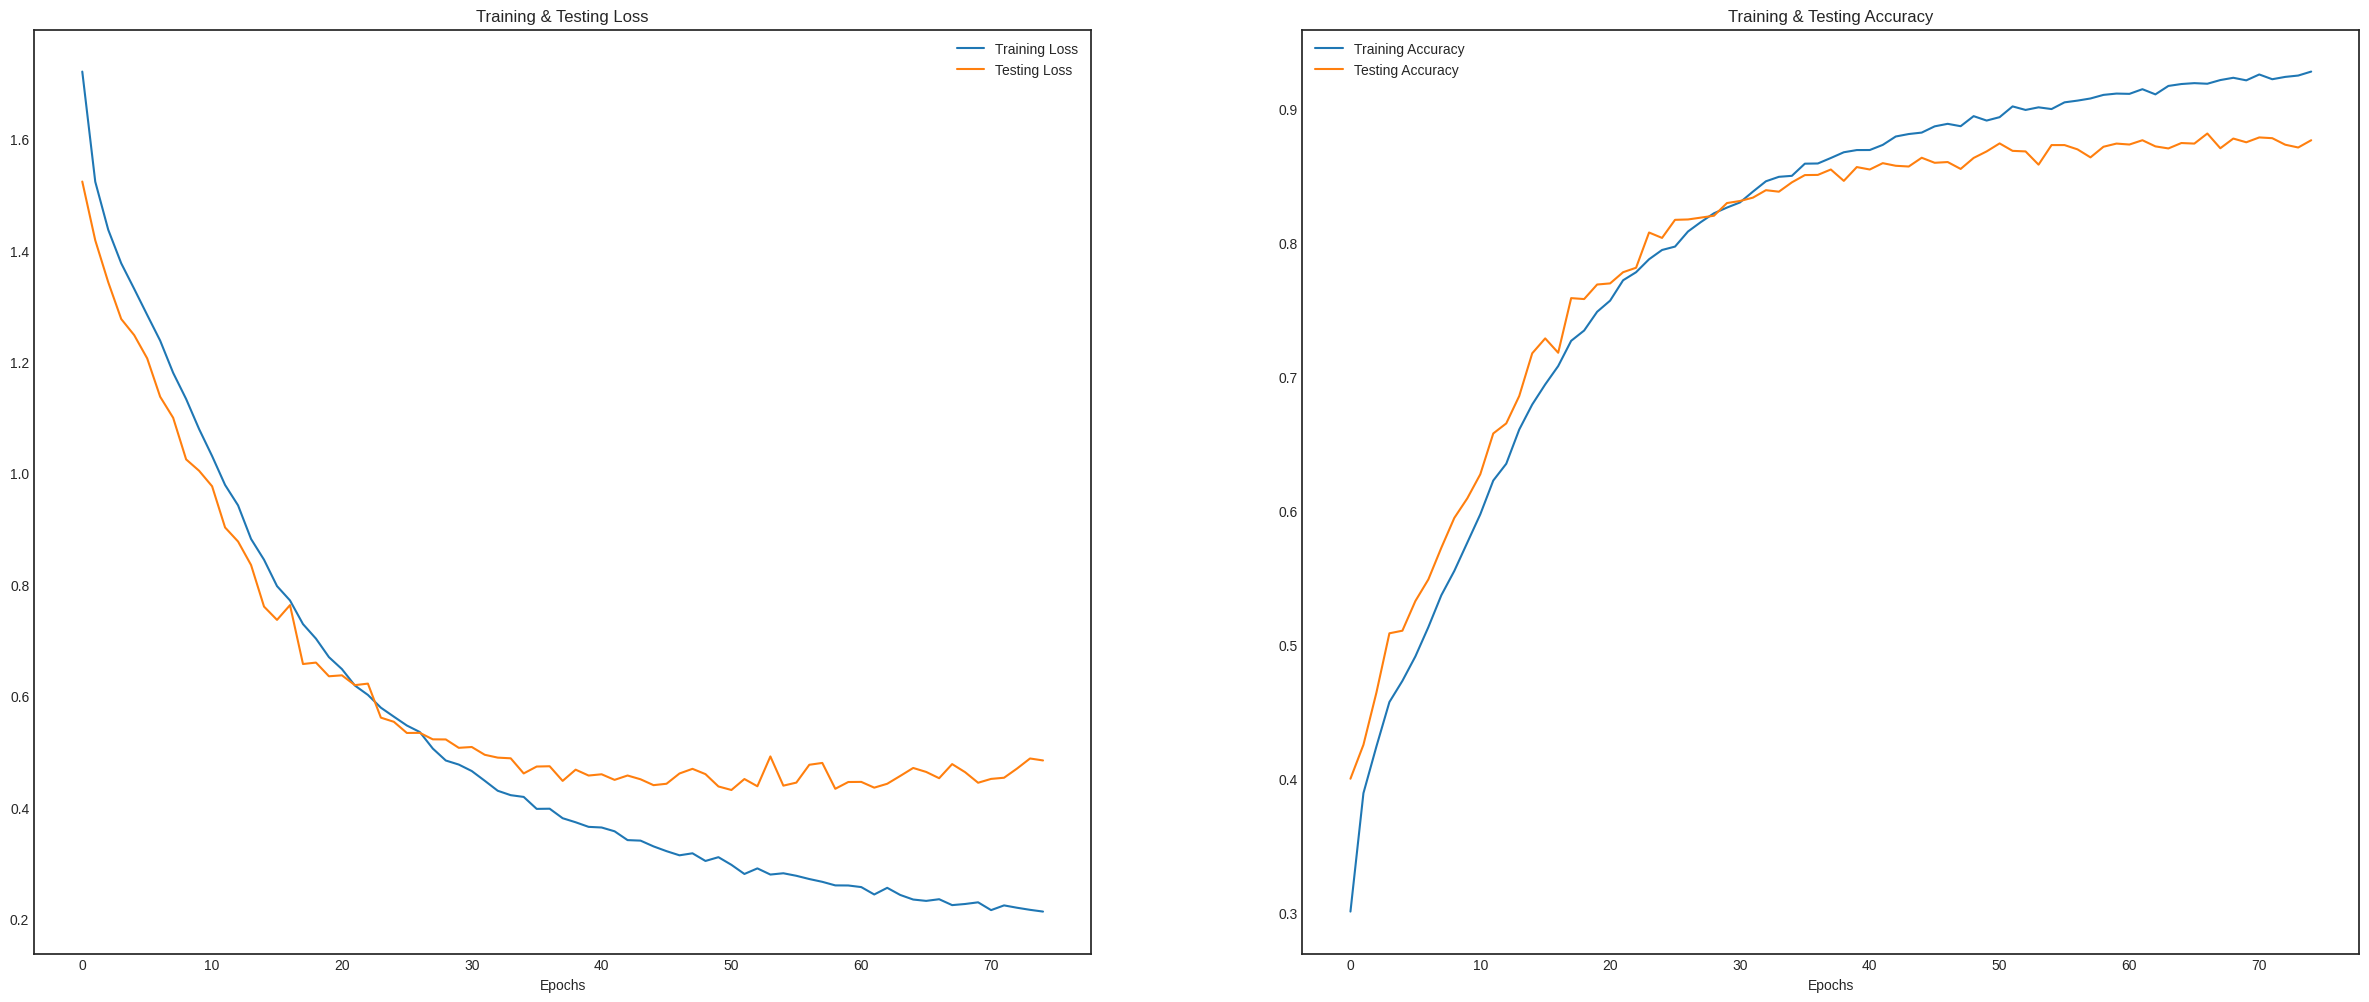

In [60]:
show_graphs(male_history)

# Confusion Matrix

In [61]:
# predicting on test data.
pred_test = female_model.predict(x_testF)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testF)

308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


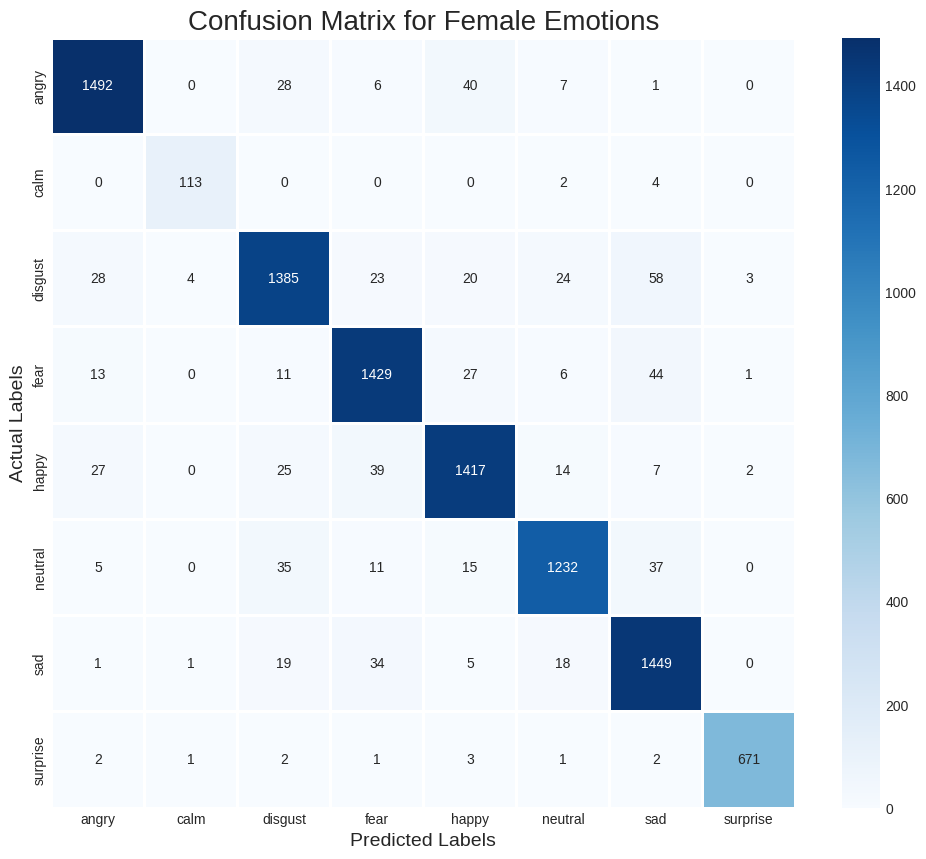

In [62]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Female Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [63]:
# predicting on test data.
pred_test = male_model.predict(x_testM)
y_pred = encoder.inverse_transform(pred_test)
y_test_ = encoder.inverse_transform(y_testM)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


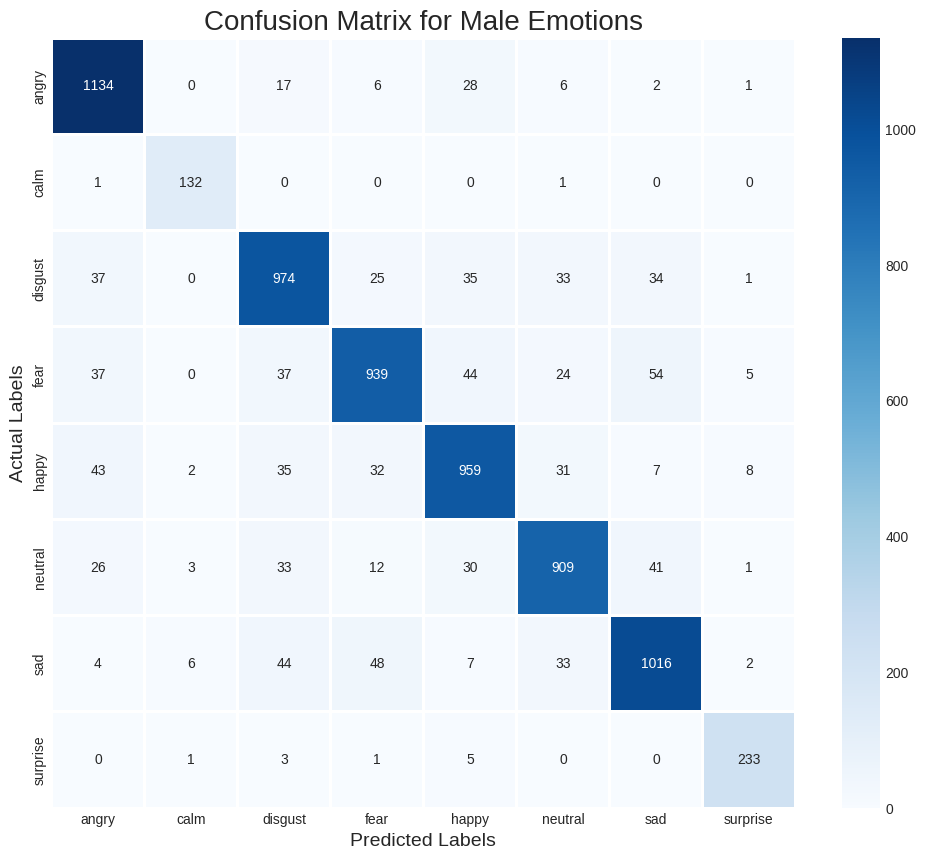

In [64]:
cm = confusion_matrix(y_test_, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix for Male Emotions', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Pre-process Audio

In [70]:
def preprocess_audio(file_path, sr=22050, n_mels=58, max_duration=5):
    audio, _ = librosa.load(file_path, sr=sr, duration=max_duration)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    log_mel_spectrogram = np.mean(log_mel_spectrogram, axis=1)
    log_mel_spectrogram = log_mel_spectrogram.reshape(-1, 1)

    return log_mel_spectrogram

In [71]:
sample_1 = "/content/drive/MyDrive/sample audios/angry.wav"
sample_features_1 = preprocess_audio(sample_1)

sample_2 = "/content/drive/MyDrive/sample audios/happy.wav"
sample_features_2 = preprocess_audio(sample_2)

sample_3 = "/content/drive/MyDrive/sample audios/sad.wav"
sample_features_3 = preprocess_audio(sample_3)

#sample_4 = "/content/sample audios/.wav"
#sample_features_4 = preprocess_audio(sample_4)

sample_feature_1 = np.expand_dims(sample_features_1, axis=0)
sample_feature_2 = np.expand_dims(sample_features_2, axis=0)
sample_feature_3 = np.expand_dims(sample_features_3, axis=0)
#sample_feature_4 = np.expand_dims(sample_features_4, axis=0)

# Emotional Speech Recognition (Prediction)

In [72]:
predicted_total_1 = total_model.predict(sample_feature_1)
predicted_total_2 = total_model.predict(sample_feature_2)
predicted_total_3 = total_model.predict(sample_feature_3)
#predicted_total_4 = total_model.predict(sample_feature_4)

# Interpret the prediction
emotion_labels = ["neutral", "calm", "happy", "sad", "angry", "fear", "disgust", "surprise"]

predicted_emotion_index_1 = np.argmax(predicted_total_1)
predicted_emotion_1 = emotion_labels[predicted_emotion_index_1]

predicted_emotion_index_2 = np.argmax(predicted_total_2)
predicted_emotion_2 = emotion_labels[predicted_emotion_index_2]

predicted_emotion_index_3 = np.argmax(predicted_total_3)
predicted_emotion_3 = emotion_labels[predicted_emotion_index_3]

#predicted_emotion_index_4 = np.argmax(predicted_total_4)
#predicted_emotion_4 = emotion_labels[predicted_emotion_index_4]

print(f"Predicted Emotion: {predicted_emotion_1}")
print(f"Predicted Emotion: {predicted_emotion_2}")
print(f"Predicted Emotion: {predicted_emotion_3}")
#print(f"Predicted Emotion: {predicted_emotion_4}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Emotion: sad
Predicted Emotion: calm
Predicted Emotion: sad


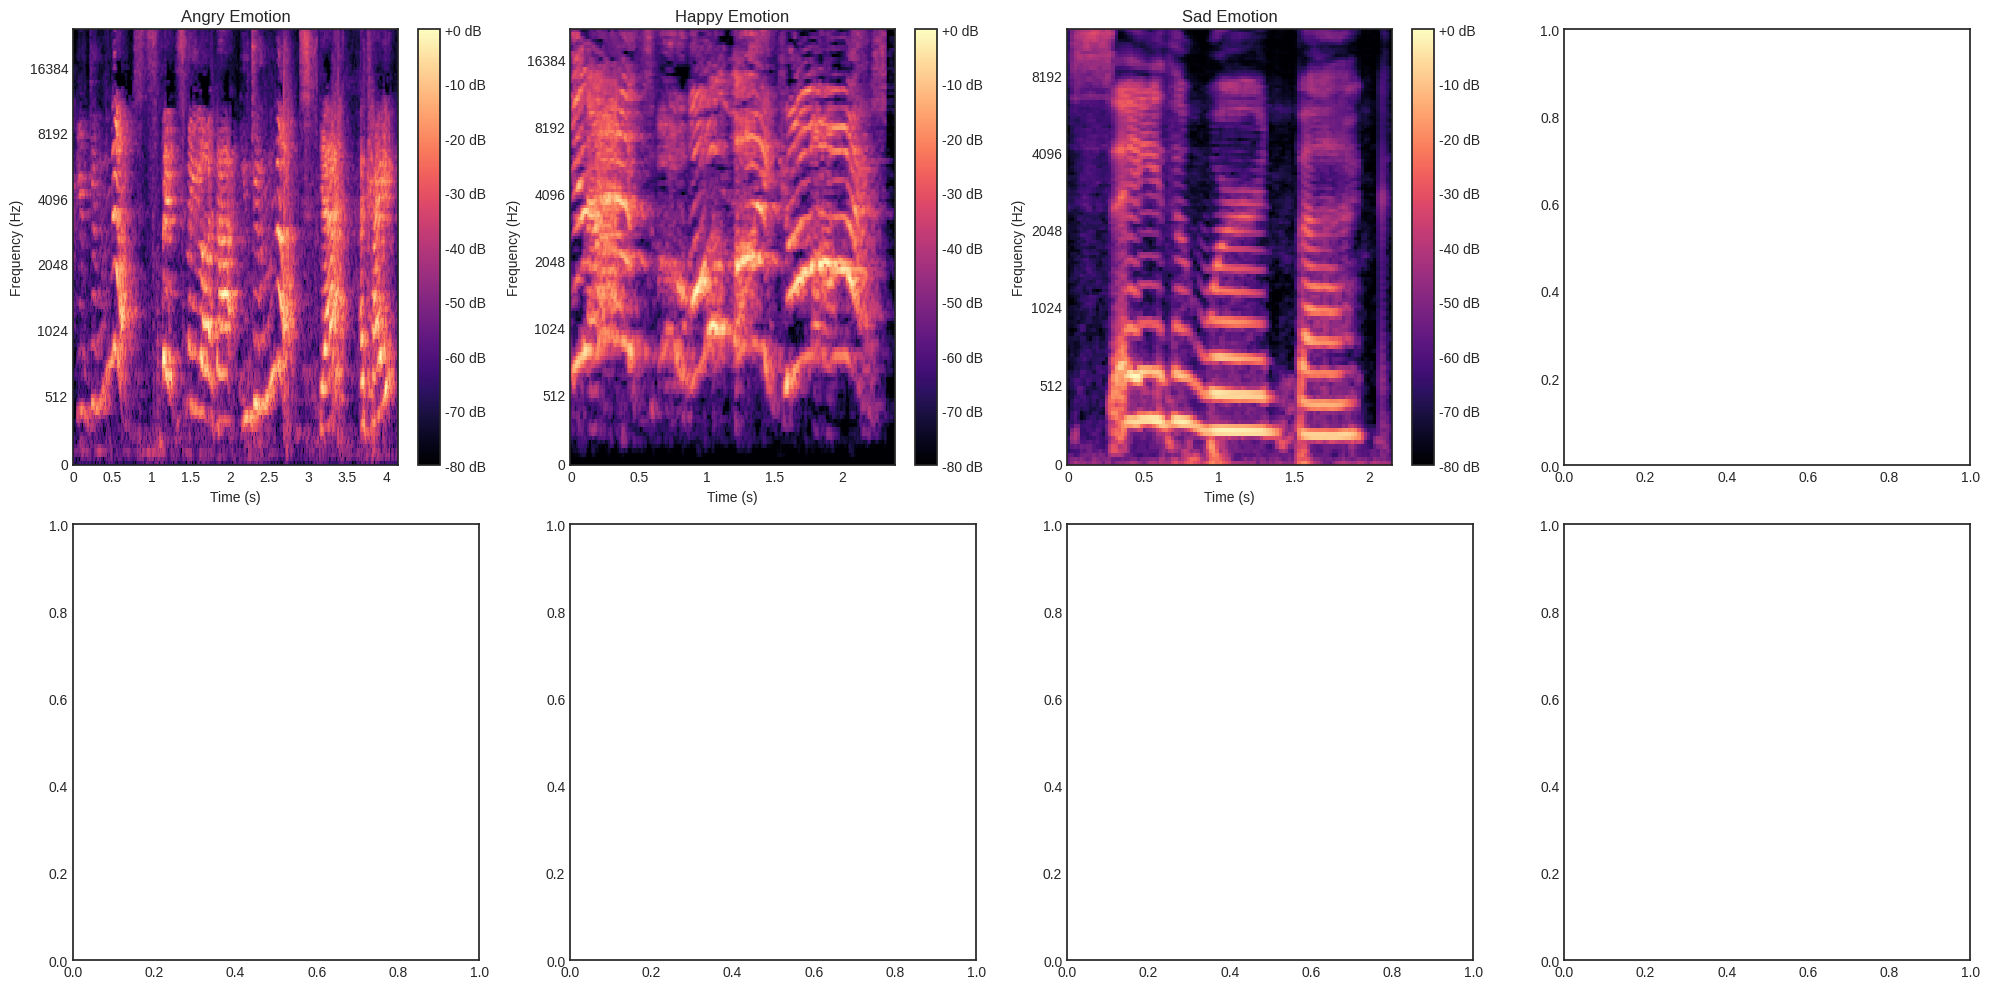

In [83]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_all_spectrograms(emotions):
    # Create a subplot grid
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for idx, (emotion, path) in enumerate(emotions.items()):
        # Load audio file
        data, sample_rate = librosa.load(path, sr=None)

        # Compute spectrogram
        spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128, fmax=8000)
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

        # Plot on the corresponding subplot
        img = librosa.display.specshow(log_spectrogram, sr=sample_rate, ax=axes[idx], x_axis='time', y_axis='mel')
        axes[idx].set_title(f"{emotion.capitalize()} Emotion")
        axes[idx].set_xlabel("Time (s)")
        axes[idx].set_ylabel("Frequency (Hz)")

        # Add color bar to each subplot
        fig.colorbar(img, ax=axes[idx], format='%+2.0f dB')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with your audio paths
plot_all_spectrograms(emotions)


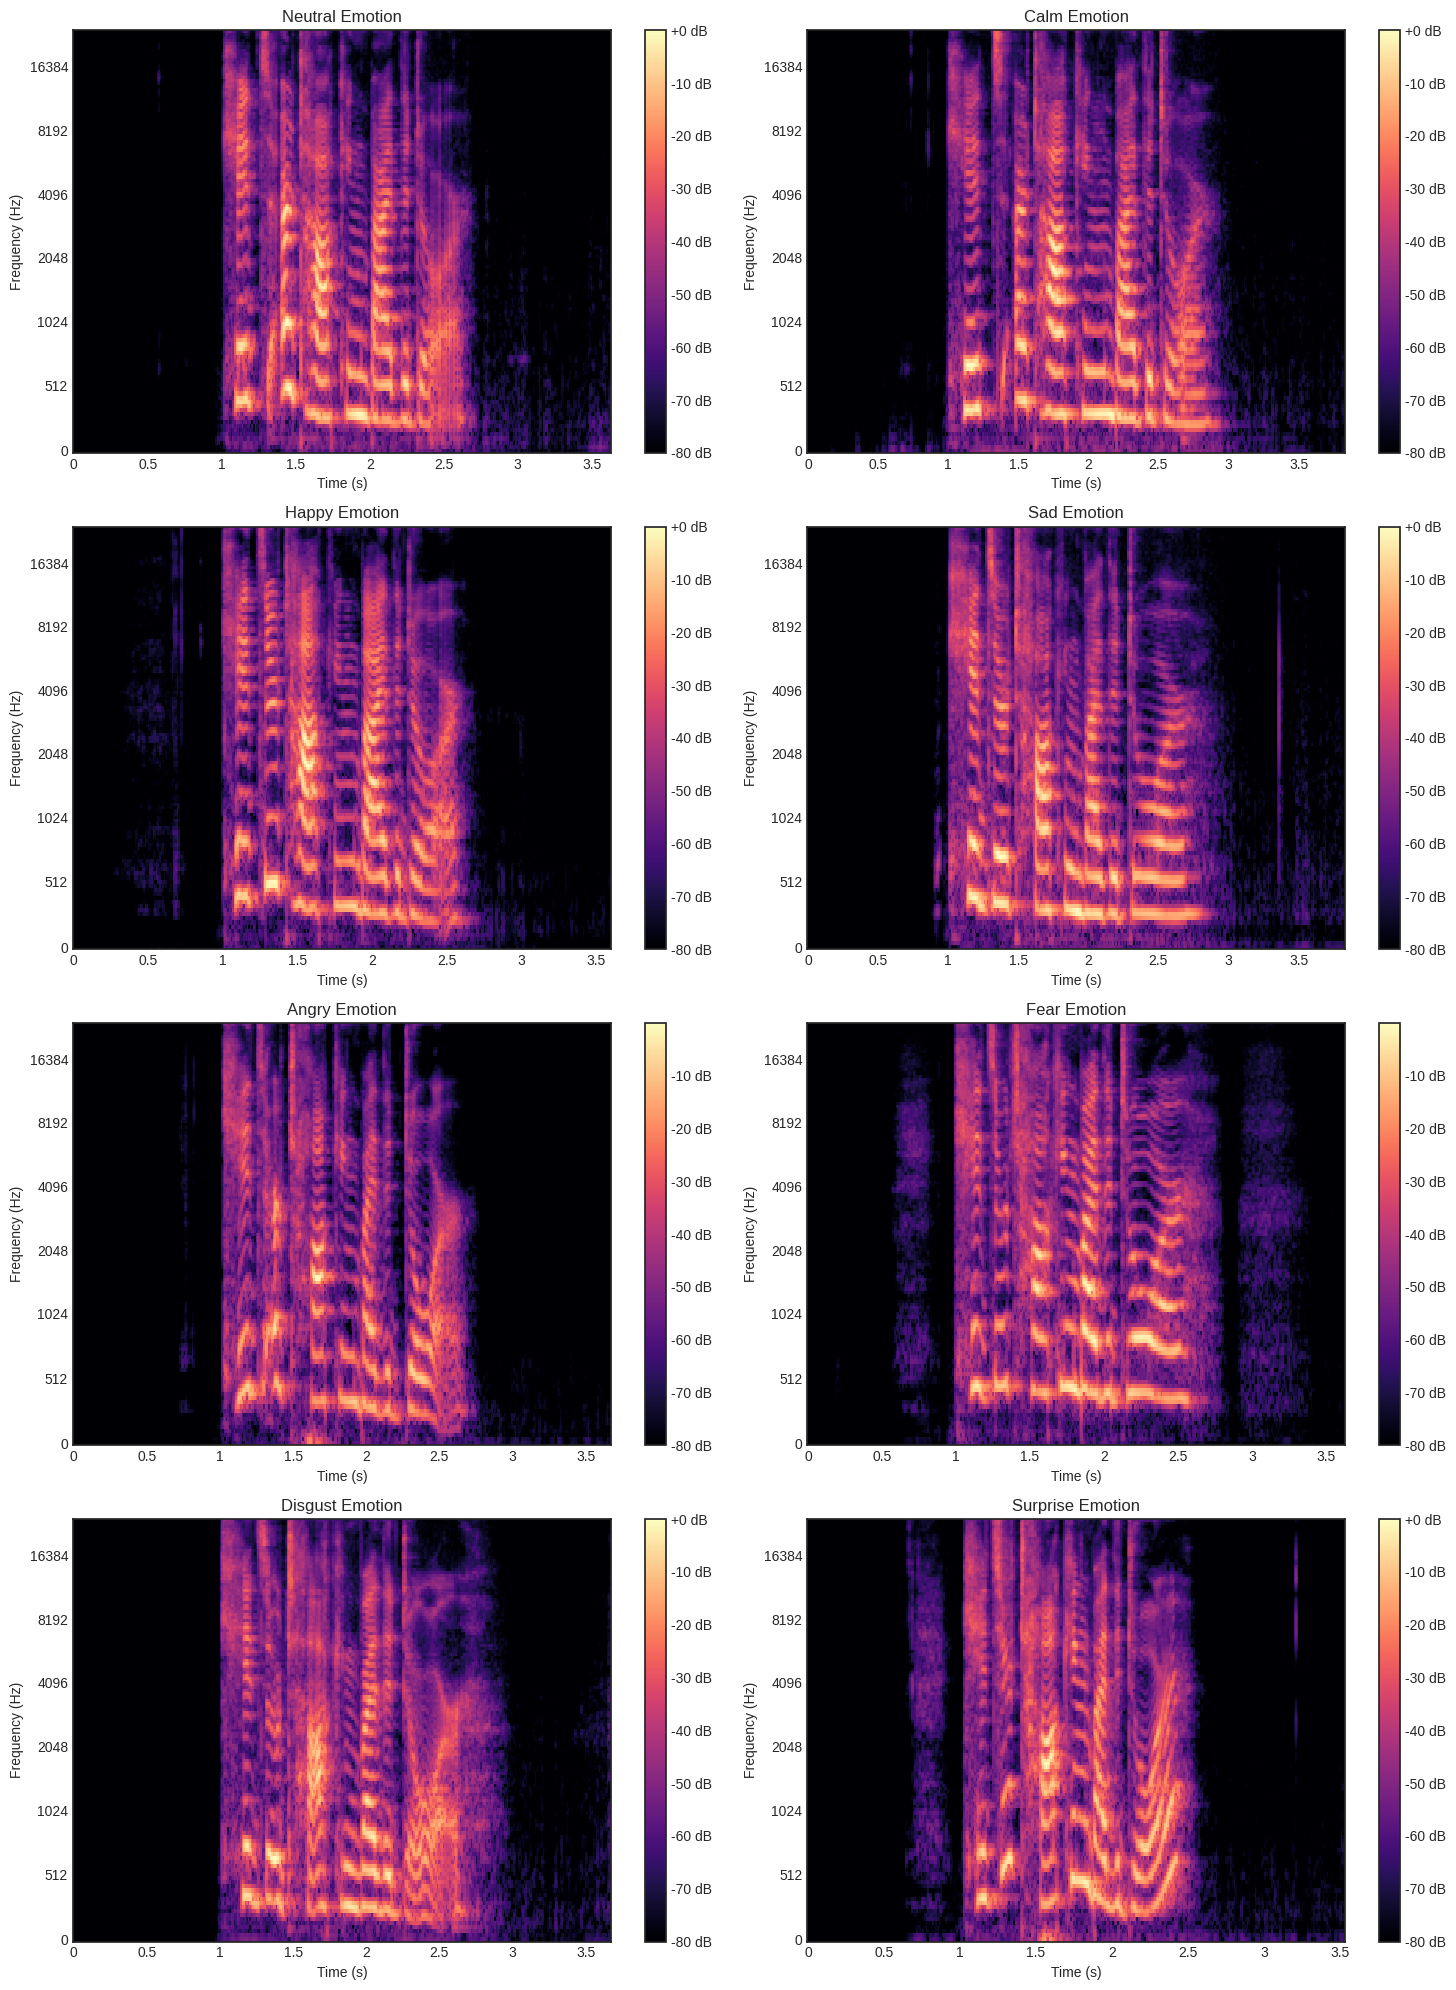

In [79]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_all_spectrograms(emotions):
    # Create a subplot grid with 2 columns
    rows = (len(emotions) + 1) // 2  # Calculate rows based on number of emotions
    fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 5))  # Adjust figure size for readability
    axes = axes.flatten()

    for idx, (emotion, path) in enumerate(emotions.items()):
        # Load audio file
        data, sample_rate = librosa.load(path, sr=None)

        # Compute spectrogram
        spectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128, fmax=8000)
        log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

        # Plot on the corresponding subplot
        img = librosa.display.specshow(log_spectrogram, sr=sample_rate, ax=axes[idx], x_axis='time', y_axis='mel')
        axes[idx].set_title(f"{emotion.capitalize()} Emotion")
        axes[idx].set_xlabel("Time (s)")
        axes[idx].set_ylabel("Frequency (Hz)")

        # Add color bar to each subplot
        fig.colorbar(img, ax=axes[idx], format='%+2.0f dB')

    # Hide any unused subplots
    for idx in range(len(emotions), len(axes)):
        fig.delaxes(axes[idx])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage with a dictionary of emotions and audio file paths
emotions = {
    'neutral': '/content/neutral.wav',
    'calm': '/content/calm.wav',
    'happy': '/content/happy.wav',
    'sad': '/content/sad.wav',
    'angry': '/content/angry.wav',
    'fear': '/content/fear.wav',
    'disgust': '/content/disgust.wav',
    'surprise': '/content/surprised.wav'
}

plot_all_spectrograms(emotions)


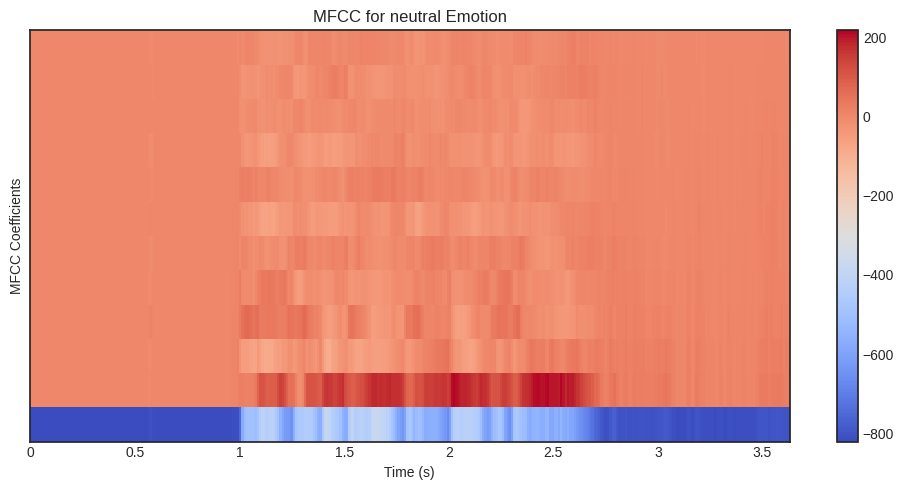

MFCCs for neutral:
[-6.7585181e+02  6.8959435e+01 -4.9626026e+00  5.4231405e+00
  6.0984218e-01  3.1607316e+00 -9.5288439e+00  2.6474686e+00
 -9.2304926e+00 -3.4923790e+00 -2.7755570e+00 -8.5833704e-01]


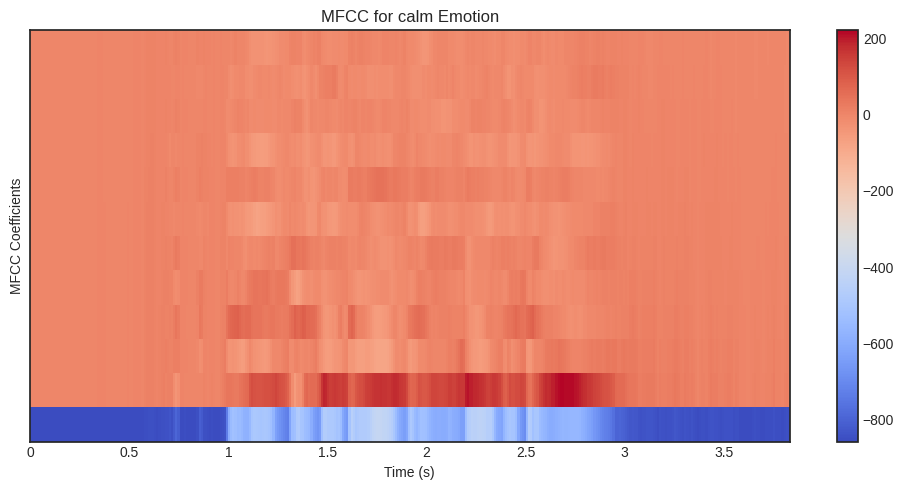

MFCCs for calm:
[-698.07587     70.690025    -2.29        12.190497     1.1434665
    4.619095    -9.343387     5.610262    -9.482477    -2.0852337
   -2.5283892   -2.290745 ]


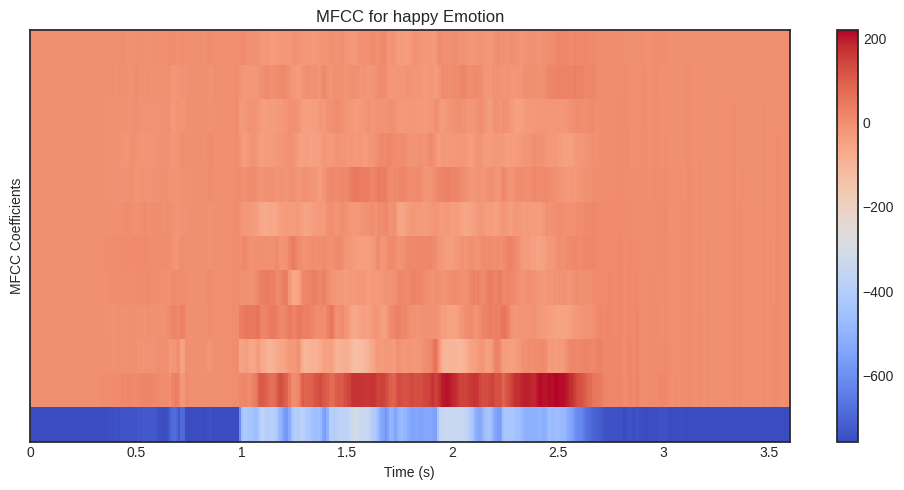

MFCCs for happy:
[-615.3698      64.712395   -17.525738     1.0721176    2.1432567
   -0.7451552  -10.137992     1.4398386   -9.424702    -8.146935
   -1.7783347   -3.56471  ]


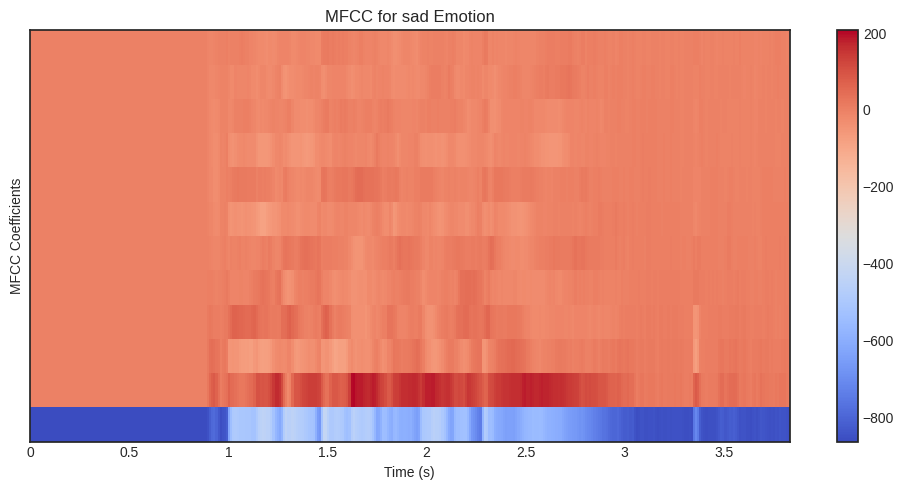

MFCCs for sad:
[-706.5462      70.95973     -4.1365914    6.6439743   -0.8450789
    3.2053216  -10.462762     2.9966118  -11.937459    -4.443748
   -5.141396    -3.6179626]


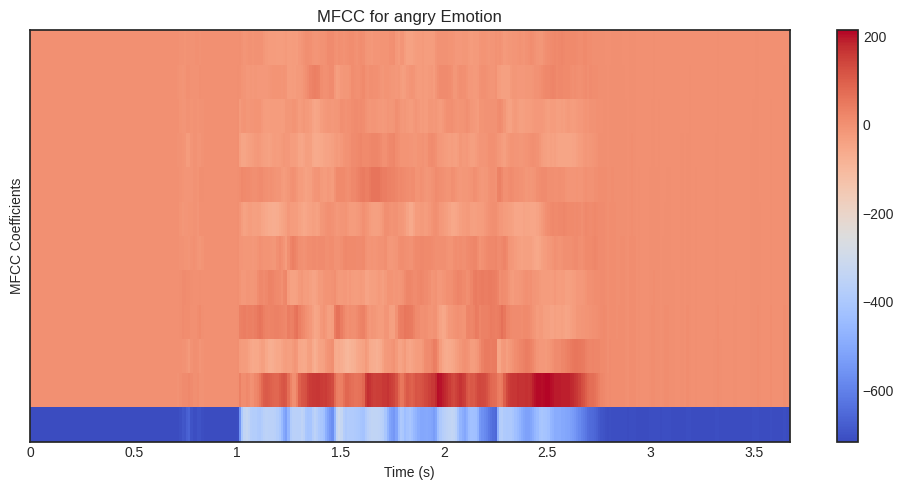

MFCCs for angry:
[-588.2538       59.247963     -8.007299      4.542206     -1.3240749
    0.97312593   -9.401972      2.0553992    -7.919817     -6.6781945
   -1.9953738    -2.8655589 ]


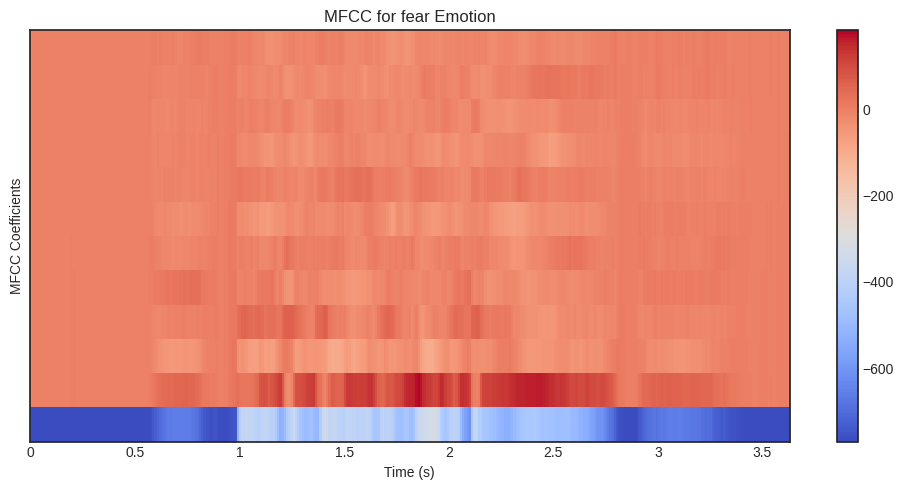

MFCCs for fear:
[-595.8171       59.382217    -25.655392      1.5161921    -4.867662
   -1.9652693   -16.650066      0.68378323  -14.741965     -8.69511
   -4.620431     -6.8369813 ]


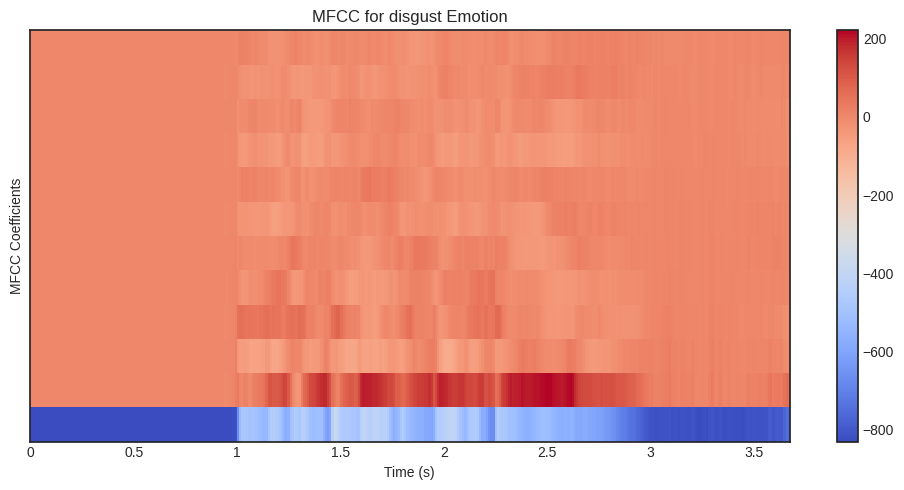

MFCCs for disgust:
[-666.80176      72.579124    -11.815957      6.9202304    -2.7584267
    0.74923795   -5.37671       1.8880272   -13.4000025    -4.9366503
   -2.6466627    -0.79795146]


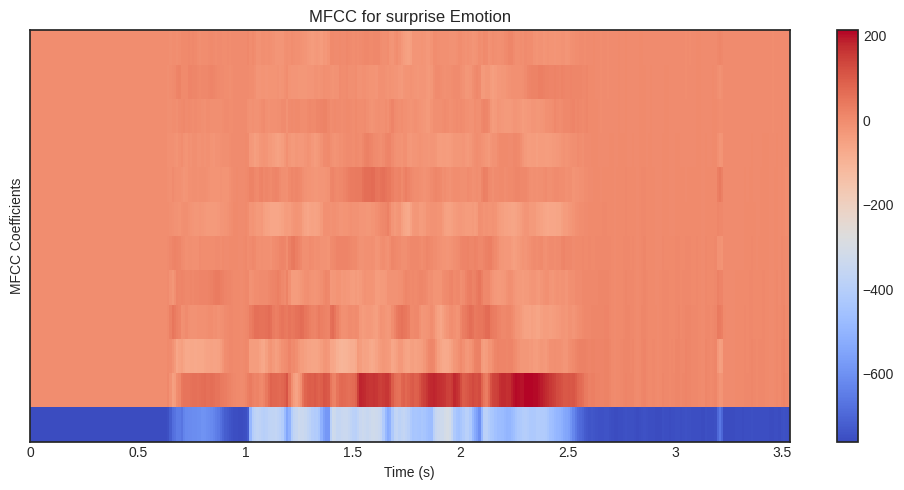

MFCCs for surprise:
[-6.01557068e+02  5.62270699e+01 -1.47886181e+01  5.83239603e+00
 -5.44787467e-01  1.75966156e+00 -1.39631815e+01  3.95009542e+00
 -7.41267538e+00 -1.88063085e+00 -2.53812885e+00 -3.53691292e+00]


In [77]:
def plot_mfcc(audio_path, emotion):
    # Load the audio file
    data, sample_rate = librosa.load(audio_path, sr=None)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=12)

    # Plot MFCCs
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCC for {emotion} Emotion")
    plt.xlabel("Time (s)")
    plt.ylabel("MFCC Coefficients")
    plt.tight_layout()
    plt.show()

    # Print MFCC array (optional)
    print(f"MFCCs for {emotion}:")
    print(mfccs.mean(axis=1))

for emotion, path in emotions.items():
    plot_mfcc(path, emotion)